In [5]:
import pandas as pd

In [6]:
df_county = pd.read_csv('data/us_counties_covid19_daily.csv')

In [8]:
df_county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [20]:
df_county.shape

(528006, 6)

In [9]:
df_daily = pd.read_csv('data/us_covid19_daily.csv')

In [10]:
df_daily.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200912,56,6449208,79637032,10403.0,30689.0,386038.0,6478.0,18648.0,1610.0,...,2020-09-12T00:00:00Z,86096643,86086240,86086240,663,1027,726387,37295,763682,1c48f1e0af4dc85463dd087fb2d1cfc4b52ed7dc
1,20200911,56,6411913,78910645,10813.0,31421.0,385011.0,6379.0,18549.0,1715.0,...,2020-09-11T00:00:00Z,85333371,85322558,85322558,1018,1553,721070,44927,765997,97633c7d65f2da5689dc71eecc4eda234aa70e51
2,20200910,56,6366986,78189575,10530.0,32419.0,383458.0,6524.0,18453.0,1925.0,...,2020-09-10T00:00:00Z,84567091,84556561,84556561,1170,1532,576461,37581,614042,9f5d388dd55ac90f6f8e7b31cbd43b419b7469b5
3,20200909,56,6329405,77613114,6551.0,32562.0,381926.0,6646.0,18322.0,1903.0,...,2020-09-09T00:00:00Z,83949070,83942519,83942519,1089,2060,553429,30983,584412,e5c534217742be6f09560d25616f96c0d1915b4c
4,20200908,56,6298422,77059685,8983.0,32263.0,379866.0,6542.0,18189.0,1879.0,...,2020-09-08T00:00:00Z,83367090,83358107,83358107,358,959,486487,22223,508710,c43bc49c6f42a78c85c704d97acdf1044d89bc3b


In [11]:
df_state= pd.read_csv('data/us_states_covid19_daily.csv')

In [12]:
df_state.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200912,AK,7131.0,392498.0,NaN,32.0,NaN,NaN,NaN,8.0,...,399629,1,0,6ed96581d6f283512d613fd9d8effc30816ecb45,0,0,0,0,0,NaN
1,20200912,AL,137646.0,878723.0,NaN,793.0,15527.0,NaN,1608.0,NaN,...,1016369,17,0,1cd15fd36fcc8ee078e9743aa31ef3556e720326,0,0,0,0,0,NaN
2,20200912,AR,69710.0,750290.0,NaN,325.0,4678.0,170.0,NaN,68.0,...,820000,16,0,dbb33b17658ac1e96621deb25f7dc7f29893e1d5,0,0,0,0,0,NaN
3,20200912,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,ca96fa86c9a0c4210a96c86ab92800701dce88ad,0,0,0,0,0,NaN
4,20200912,AZ,208128.0,1080601.0,NaN,574.0,21773.0,185.0,NaN,93.0,...,1288729,27,26,db0c2cfab2010f171b4a7b39a6a0654d5187820d,0,0,0,0,0,NaN


In [19]:
df_state.shape

(10794, 54)

In [39]:
# df_state[df_state['state']=="AK"].positive.sum()

340341.0

In [45]:
index_names=df_state.query('state=="MP" | state=="PR"|state=="VI"|state=="AS"|state=="GU"').index

In [46]:
df_state.drop(index_names, inplace = True) 

In [55]:
positive=df_state.groupby(by='state').positive.sum()

In [56]:
negative=df_state.groupby(by='state').negative.sum()

In [60]:
negative.shape

(51,)

In [62]:
import seaborn as sns


In [90]:
neg=pd.DataFrame(negative).reset_index()

In [94]:
pos=pd.DataFrame(positive).reset_index()

In [96]:
neg.head()

,state,negative
0,AK,22509113.0
1,AL,62041041.0
2,AR,46663301.0
3,AZ,74145440.0
4,CA,719459740.0


In [97]:
pos.head()

,state,positive
0,AK,340341.0
1,AL,8158237.0
2,AR,3993243.0
3,AZ,14364717.0
4,CA,46859790.0


In [99]:
state_test=pd.merge(pos,neg,how='outer',on='state')

In [100]:
state_test.head()

,state,positive,negative
0,AK,340341.0,22509113.0
1,AL,8158237.0,62041041.0
2,AR,3993243.0,46663301.0
3,AZ,14364717.0,74145440.0
4,CA,46859790.0,719459740.0


In [101]:
sum_data = df_state.groupby(['state'])['positive','negative'].sum().reset_index()

In [126]:
sum_data=sum_data.sort_values('negative')

In [111]:
import matplotlib as plt

In [122]:
%config InlineBackend.figure_format = 'svg'

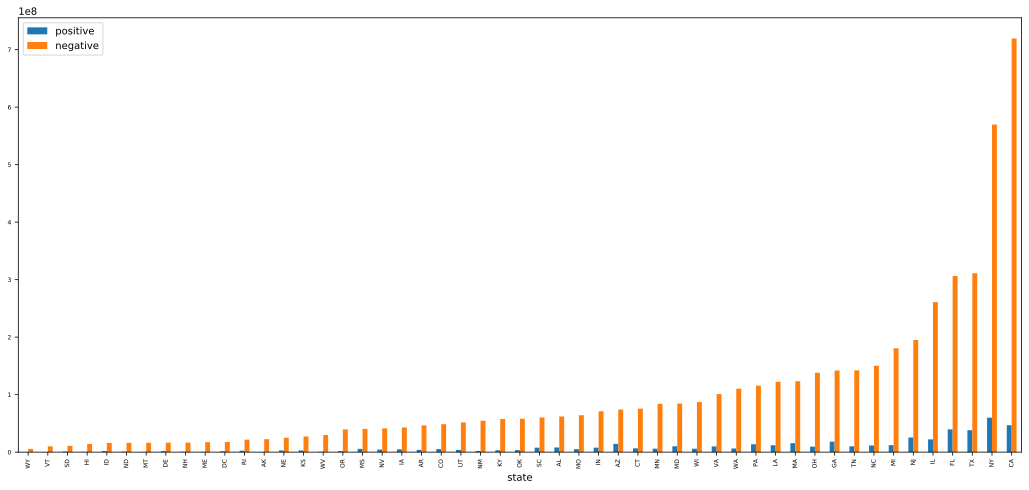

In [127]:
sum_data.plot(kind='bar', x= 'state',figsize = (18,8), fontsize = 6)